**Import Libraries & Generate Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Generate synthetic linear dataset with noise**

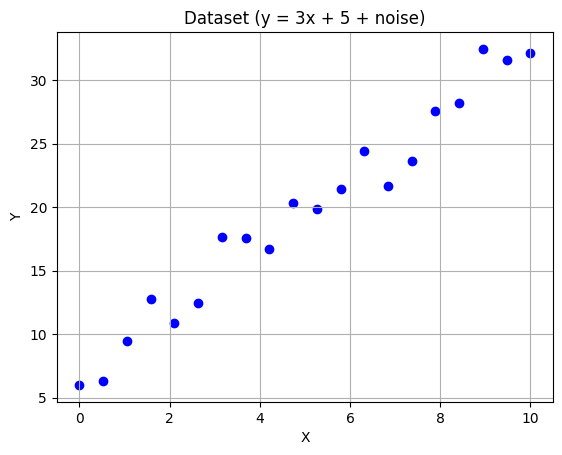

In [ ]:
# Generate synthetic linear data: y = 3x + 5 + noise
np.random.seed(42)
X = np.linspace(0, 10, 20)
Y = 3 * X + 5 + np.random.randn(20) * 2  # Add noise

plt.scatter(X, Y, color='blue')
plt.title("Dataset (y = 3x + 5 + noise)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

**Define Objective Function (MSE)**

In [ ]:
# Objective function: minimize Mean Squared Error (MSE)
def objective_function(params):
    w, b = params
    Y_pred = w * X + b
    mse = np.mean((Y - Y_pred)**2)
    return mse

**Implement TLBO Algorithm**

In [ ]:
def TLBO(objective_func, bounds, pop_size=30, iterations=100):
    dim = len(bounds)
    pop = np.random.uniform(
        [b[0] for b in bounds],
        [b[1] for b in bounds],
        (pop_size, dim)
    )

    best_values = []
    for it in range(iterations):
        fitness = np.array([objective_func(ind) for ind in pop])
        teacher_idx = np.argmin(fitness)
        teacher = pop[teacher_idx]
        mean = np.mean(pop, axis=0)

        # -------- Teacher Phase --------
        TF = np.random.randint(1, 3)  # 1 or 2
        for i in range(pop_size):
            r = np.random.rand(dim)
            new_solution = pop[i] + r * (teacher - TF * mean)
            new_solution = np.clip(new_solution, [b[0] for b in bounds], [b[1] for b in bounds])
            if objective_func(new_solution) < fitness[i]:
                pop[i] = new_solution
                fitness[i] = objective_func(new_solution)

        # -------- Learner Phase --------
        for i in range(pop_size):
            j = np.random.randint(pop_size)
            while j == i:
                j = np.random.randint(pop_size)
            r = np.random.rand(dim)
            if fitness[i] < fitness[j]:
                new_solution = pop[i] + r * (pop[i] - pop[j])
            else:
                new_solution = pop[i] + r * (pop[j] - pop[i])
            new_solution = np.clip(new_solution, [b[0] for b in bounds], [b[1] for b in bounds])
            if objective_func(new_solution) < fitness[i]:
                pop[i] = new_solution
                fitness[i] = objective_func(new_solution)

        best_values.append(np.min(fitness))

    best_idx = np.argmin(fitness)
    best_solution = pop[best_idx]
    best_value = fitness[best_idx]
    return best_solution, best_value, best_values


**Run TLBO Optimization**

In [ ]:
# Run TLBO
bounds = [(-10, 10), (-10, 10)]  # bounds for w and b
best_solution, best_value, best_values = TLBO(objective_function, bounds)

print(" Best parameters (w, b):", best_solution)
print(" Best MSE:", best_value)


 Best parameters (w, b): [2.62165392 6.54913327]
 Best MSE: 2.183839624782765


**Plot TLBO Convergence Curve**

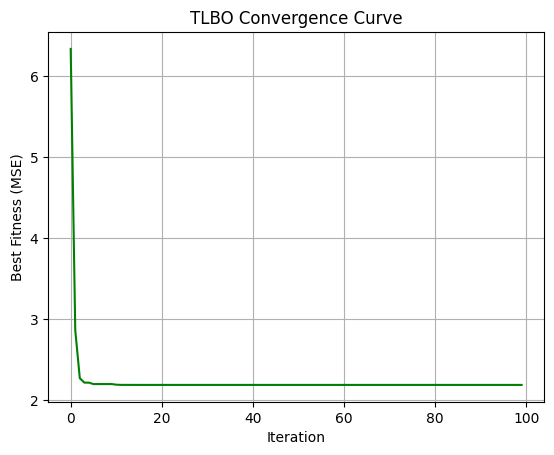

In [ ]:
#  Visualization of convergence

plt.plot(best_values, color='green')
plt.title("TLBO Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness (MSE)")
plt.grid(True)
plt.show()

**Plot Fitted Line Using Optimal Parameters**

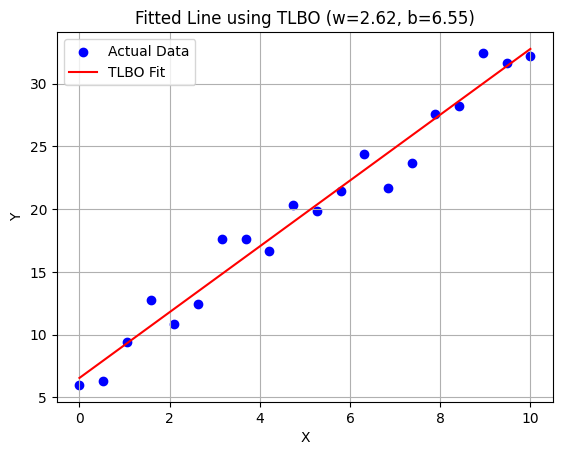

In [ ]:
#  Visualize fitted line

w, b = best_solution
Y_pred = w * X + b

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='TLBO Fit')
plt.title(f"Fitted Line using TLBO (w={w:.2f}, b={b:.2f})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

